In [1]:
import numpy as np
import librosa

import IPython.display as ipd
from matplotlib import pyplot
from tensorflow.keras.models import load_model

In [2]:
def grab_sound_features(filename):
    sample_rate = 12000
    duration = 3

    # Cargamos el audio
    X, sample_rate = librosa.load(filename, sr=sample_rate, res_type='kaiser_fast')
    
    return librosa.feature.melspectrogram(y=X, sr=sample_rate).transpose()

In [3]:
#model = load_model('lstm_01-base.h5')
model = load_model('lstm_02-front-padding.h5')

In [4]:
# [no-scream, scream]
#filename = "data/no-scream/344-3-0-0.wav"
#filename = "data/scream/2scream.wav"
#filename = "data/s-ns.wav"
filename = "data/ns-s.wav"
X = grab_sound_features(filename)
X2 = X[None,:]
result = model.predict(X2)

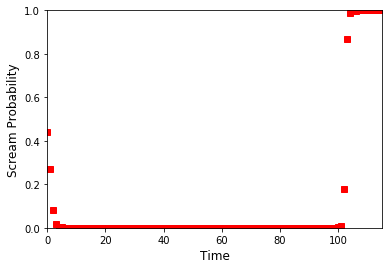

In [5]:
pyplot.plot(result[0,:,1], 'rs')
pyplot.xlabel('Time', fontsize = 12)
pyplot.ylabel('Scream Probability', fontsize = 12)
pyplot.axis([0, result.shape[1], 0, 1])
pyplot.show()
ipd.Audio(filename)